In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *


Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download = drive.CreateFile({'id': '1R5DHT3bZUFj6YHkhhFJ4Dd1LysfnZNRT'})

download.GetContentFile('train.zip')
!unzip train.zip

download = drive.CreateFile({'id': '1WtDn2jxzjwgWleM6N75sW2kqUP3zHmHh'})
download.GetContentFile('test.zip')
!unzip test.zip

In [0]:
classes = ['Sweep Shot', 'Drive Shot', 'Square Cut', 'Pull Shot', 'Umpire Out', 'Umpire Six']

In [0]:
path = Path(root_dir + 'University/Thesis/data_rgb/shots')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
 ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.852637,0.908363,0.257353,00:58
1,1.325575,0.546626,0.186275,00:57
2,0.950982,0.413741,0.137255,00:56
3,0.725711,0.314644,0.112745,00:56
4,0.588622,0.297822,0.110294,00:55


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


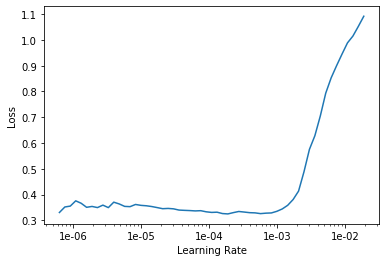

In [0]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.353858,0.255405,0.095588,00:56
1,0.309988,0.241001,0.078431,00:57
2,0.243107,0.131834,0.041667,00:58
3,0.184452,0.113217,0.031863,00:57
4,0.144479,0.107728,0.031863,00:57


In [0]:
learn.save('stage-2')

In [0]:
learn.fit_one_cycle(2, max_lr=slice(2e-5,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.091311,0.099890,0.029412,00:55
1,0.087937,0.089307,0.026961,00:55


In [0]:
learn.save('stage-2')

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.071852,0.096851,0.024510,00:58
1,0.080712,0.084710,0.019608,00:58


In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

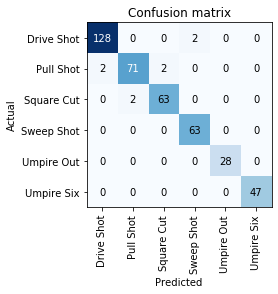

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('Drive Shot', 'Sweep Shot', 2),
 ('Pull Shot', 'Drive Shot', 2),
 ('Pull Shot', 'Square Cut', 2),
 ('Square Cut', 'Pull Shot', 2)]

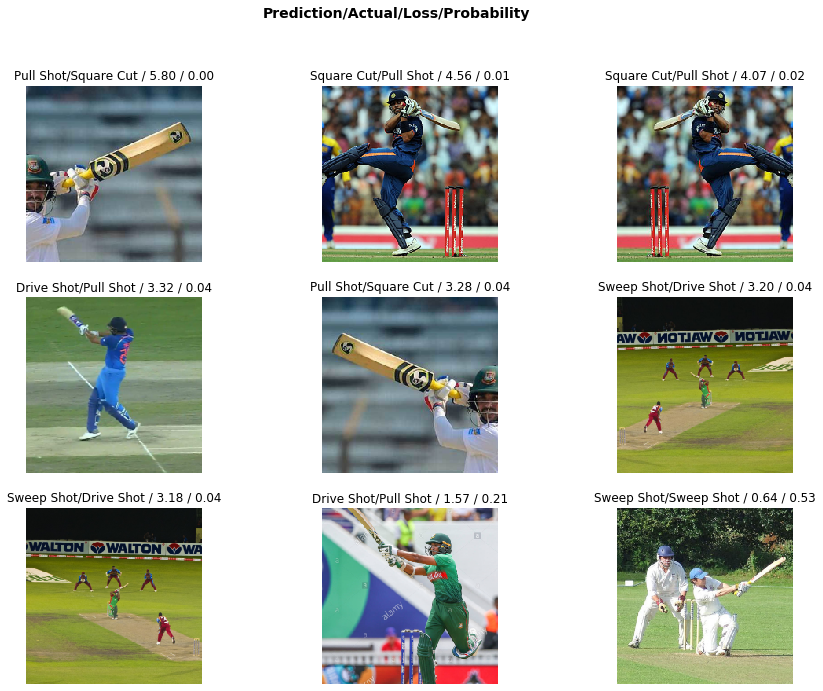

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.export()
defaults.device = torch.device('cpu')
learn = load_learner(path)